# Pokemon Classification
---

Data Source: https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420?select=pokedex_%28Update_04.21%29.csv

CSV file: pokedex_(Update_04.21).csv

## From Kaggle: 

### About this file
This file contains information about 1045 pokemon (including varieties). The information is sorted in different groups:

#### Pokedex Data:

- `pokedex_number`: The entry number of the Pokemon in the National Pokedex
- `name`: The English name of the Pokemon
- `german_name`: The German name of the Pokemon
- `japanese_name`: The Original Japanese name of the Pokemon
- `generation`: The numbered generation which the Pokemon was first introduced
- `issublegendary`: Denotes if the Pokemon is sub-legendary
- `is_legendary`: Denotes if the Pokemon is legendary
- `is_mythical`: Denotes if the Pokemon is mythical
- `species`: The Categorie of the Pokemon
- `type_number`: Number of types that the Pokemon has
- `type_1`: The Primary Type of the Pokemon
- `type_2`: The Secondary Type of the Pokemon if it has it
- `height_m`: Height of the Pokemon in meters
- `weight_kg`: The Weight of the Pokemon in kilograms
- `abilities_number`: The number of abilities of the Pokemon
- `ability_?`: Name of the Pokemon abilities
- `ability_hidden`: Name of the hidden ability of the Pokemon if it has one

#### Base stats:

- `total_points`: Total number of Base Points
- `hp`: The Base HP of the Pokemon
- `attack`: The Base Attack of the Pokemon
- `defense`: The Base Defense of the Pokemon
- `sp_attack`: The Base Special Attack of the Pokemon
- `sp_defense`: The Base Special Defense of the Pokemon
- `speed`: The Base Speed of the Pokemon

#### Training:

- `catch_rate`: Catch Rate of the Pokemon
- `base_friendship`: The Base Friendship of the Pokemon
- `base_experience`: The Base experience of a wild Pokemon when caught
- `growth_rate`: The Growth Rate of the Pokemon

#### Breeding:

- `eggtypenumber`: Number of groups where a Pokemon can hatch
- `eggtype?`: Names of the egg groups where a Pokemon can hatch
- `percentage_male`: The percentage of the species that are male. Blank if the Pokemon is genderless.
- `egg_cycles`: The number of cycles (255-257 steps) required to hatch an egg of the Pokemon

#### Type defenses:

- `against_?`: Eighteen features that denote the amount of damage taken against an attack of a particular type

In [1]:
# import pandas
import pandas as pd

In [3]:
# pull in data from csv
pokemon = pd.read_csv('pokedex_(Update_04.21).csv', index_col=0)
# preview data
pokemon.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
# view number of columns
pokemon.columns.nunique()

50

In [6]:
# view column names
pokemon.columns

Index(['pokedex_number', 'name', 'german_name', 'japanese_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

Right off the bat, I know I won't be using some of these columns for this initial project. I intend to drop `german_name` and `japanese_name`, and will most likely not use these in any of my initial projects with this dataset.

In [7]:
# drop columns
pokemon.drop(columns=['german_name', 'japanese_name'], inplace=True)
# view remaining columns
pokemon.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'species',
       'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

<AxesSubplot:>

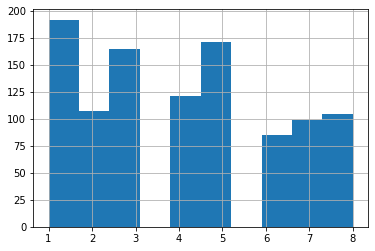

In [8]:
pokemon.generation.hist()

In [9]:
pokemon.status.value_counts()

Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: status, dtype: int64

In [10]:
pokemon.species.value_counts()

Mouse Pokémon          12
Dragon Pokémon          9
Fox Pokémon             9
Pumpkin Pokémon         8
Flame Pokémon           7
                       ..
Posy Picker Pokémon     1
Key Ring Pokémon        1
Imitation Pokémon       1
Cotton Bird Pokémon     1
Rock Skin Pokémon       1
Name: species, Length: 652, dtype: int64

In [11]:
pokemon.type_number.value_counts()

2    553
1    492
Name: type_number, dtype: int64